## ⭐ A: Preprocessing
**Main Question**: How does remote learning affect students' daily lives?</br>
**Goal**: The goal is to fix basic errors on both the 2021 and 2022 datasets to, in the end, be able to make reliable descriptive statistics calculations for each and compare the results. </br>

#### 🔴 Imports

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
# For csv import
import os
import glob
# defaultdict
from collections import defaultdict

#### 🔴 Helper Functions
- `read_csv_folder`: Reads folder and returns all excels concatenated.
- `fix_misname`: Combines columns with the same information but different names into one (e.g. PrimaryActivityCode and primary_activity_code) 

In [136]:
def read_csv_folder(path):
    '''
    Returns pandas dataframe of combined csvs in a folder.
    path: the path to the folder
    '''
    # Get all the csv files in folder
    current_path = os.getcwd()
    csv_files = glob.glob(current_path + '/' + path + '/*.csv')
    
    # Catch exception
    if len(csv_files) == 0:
        print('Interrupted. No .csv files found in folder.')
        return 
    
    ls = []

    # For all files
    for f in csv_files:

        # Read file
        df = pd.read_csv(f, index_col=None, header=0)
        # Drop additional data columns (last two)
        df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
        df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
        # Append to list
        ls.append(df)

    # concatenate dfs
    df = pd.concat(ls, axis=0, ignore_index=True)
    
    return df


def fix_misname(df, correct_names, wrong_names):
    '''
    Corrects misnamed values.
    correct_names: list of correct_names
    wrong_names: list of lists of wrong names for each correct name
    '''

    for c, i in zip(correct_names, range(len(correct_names))):
        for w in wrong_names[i]:
            df[c].fillna(df[w], inplace=True)
            df = df.drop(w, axis=1)
    
    return df

#### 🔴 Step 1: Fix Column Names
- Drop emtpy rows and columns that contain only nan values 
- Fix wrong names (e.g. primary_codes instead of PrimaryActivityCode)
- Drop unnamed columns with no valuable information (e.g. indexing)
- Drop some unneeded columns (e.g. additional data that is not needed)

#### 2022 Dataset

In [137]:
# Read and Concatenate 
df2022 = read_csv_folder('data2022/data/')

# List containing the correct names
correct_names = ['PrimaryActivityCode', 
                 'SecondaryActivityCode', 
                 'DescriptiveLabel', 
                 'StartDate', 
                 'UniBathWeekNo', 
                 'DayOfWeek', 
                 'StartTime', 
                 'EndTime', 
                 'DurationMins', 
                 'EnjoymentScore']

# List containing all wrong names 
wrong_names = [
               list(df2022.filter(regex='rimary')),
               list(df2022.filter(regex='econd')),
               list(df2022.filter(regex='escri')),
               list(df2022.filter(regex='ate')),
               list(df2022.filter(regex='ni')),
               list(df2022.filter(regex='ay')),
               ['Start Time', 'Start time (in AM/PM)', 'start_time', 'Start Time '],
               ['End Time', 'End time (in AM/PM)', 'end_time'],
               list(df2022.filter(regex='urat')),
               list(df2022.filter(regex='njoy')) 
              ]

# Remove correct names from list of wrong names
for i in range(len(wrong_names)):
    for l in wrong_names:
        for c in correct_names:
            if c in l:
                l.remove(c)

C:\Users\johng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0,2,3,5,6,7,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [138]:
print(f'Initial number of rows: {df2022.shape[0]}')
print(f'Initial number of columns: {df2022.shape[1]}')

# Drop empty rows and columns
df2022 = df2022.dropna(axis=0, how='all')
df2022 = df2022.dropna(axis=1, how='all')

# Fix wrong column name
df2022 = fix_misname(df2022, correct_names, wrong_names)

# Drop unnamed columns (either full of NaNs or indices)
df2022 = df2022[df2022.columns.drop(list(df2022.filter(regex='Unnamed')))]

# Drop specific unnecessary 
df2022 = df2022.drop(['Productivity', 'AnxietyLevels'], axis=1)

# Fill primary act code null with secondary activity (some people put secondary instead of primary)
df2022['PrimaryActivityCode'].fillna(df2022['SecondaryActivityCode'], inplace=True)

# Drop the few rows that have no activity codes 
df2022 = df2022[df2022['PrimaryActivityCode'].notna()]

print(f'Final number of rows: {df2022.shape[0]}')
print(f'Final number of columns: {df2022.shape[1]}')


Initial number of rows: 1052878
Initial number of columns: 61
Final number of rows: 3851
Final number of columns: 10


#### 2021 Dataset

In [139]:
df2021 = read_csv_folder('data2021/data/')

correct_names = ['PrimaryActivityCode', 
                 'SecondaryActivityCode', 
                 'DescriptiveLabel', 
                 'StartDate', 
                 'UniBathWeekNo', 
                 'DayOfWeek', 
                 'StartTime', 
                 'EndTime', 
                 'DurationMins', 
                 'EnjoymentScore']
wrong_names = [
               ['Primary Activity Code', 'PrimaryActivityCodes', 'First Primary Activity ', 'Activity Code'],
               ['Secondary Activity Code', 'SecondaryActivityCodes', 'First Secondary Activity  (optional activity)'],
               ['Descriptive Label', 'Activity Description'],
               list(df2021.filter(regex='Date')),
               ['Uni of Bath week'],
               list(df2021.filter(regex='Day')),
               list(df2021.filter(regex='Start Time')),
               list(df2021.filter(regex='End Time')),
               list(df2021.filter(regex='Dur')),
               list(df2021.filter(regex='Enjo')) 
              ]

for i in range(len(wrong_names)):
    for l in wrong_names:
        for c in correct_names:
            if c in l:
                l.remove(c)

In [140]:
print(f'Initial number of rows: {df2021.shape[0]}')
print(f'Initial number of columns: {df2021.shape[1]}')

# Fix wrong column name
df2021 = fix_misname(df2021, correct_names, wrong_names)

# Drop unnamed columns (either full of NaNs or indices)
df2021 = df2021[df2021.columns.drop(list(df2021.filter(regex='Unnamed')))]
# Drop columns containing "Please"
df2021 = df2021[df2021.columns.drop(list(df2021.filter(regex='Please')))]
# Drop columns containing " Activity" (wrong format)
df2021 = df2021[df2021.columns.drop(list(df2021.filter(regex=' Activity')))]
# Drop columns containing " " (wrong format)
df2021 = df2021[df2021.columns.drop(list(df2021.filter(regex=' ')))]
# Drop few remaining columns
df2021 = df2021.drop(['Timestamp', 'SleepQuality'], axis=1)

# Drop empty rows and columns
df2021 = df2021.dropna(axis=0, how='all')
df2021 = df2021.dropna(axis=1, how='all')

print(f'Final number of rows: {df2021.shape[0]}')
print(f'Final number of columns: {df2021.shape[1]}')


Initial number of rows: 3122
Initial number of columns: 244
Final number of rows: 3094
Final number of columns: 10


In [141]:
display(df2021.head())
display(df2022.head())

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,S801,,Sleeping,08/03/2021,24.0,Monday,00:00,07:00,420.0,2.0
1,O733,,Getting ready,08/03/2021,24.0,Monday,07:00,07:30,29.0,1.0
2,X893,UD415,Exercising while listening music,08/03/2021,24.0,Monday,07:30,08:15,45.0,2.0
3,ED152,,Breakfast,08/03/2021,24.0,Monday,08:15,08:45,29.0,1.0
4,CW982,,ADS Lab 3,08/03/2021,24.0,Monday,08:45,11:15,150.0,1.0


,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,S801,NaN,Sleeping,21/02/2022,22.0,Monday,00:30:00,09:00:00,510.0,2.0
1,ED145,L418,Breakfast,21/02/2022,22.0,Monday,09:00:00,09:30:00,30.0,2.0
2,T695,UD415,Chatting,21/02/2022,22.0,Monday,09:30:00,10:15:00,45.0,1.0
3,EL642,NaN,Lectures,21/02/2022,22.0,Monday,10:15:00,13:15:00,180.0,1.0
4,ED145,NaN,Lunch,21/02/2022,22.0,Monday,13:15:00,15:00:00,105.0,2.0


#### 🔴 Step 2: Fix Primary (and secondary) Activity Codes 
Primary code names are essential in identifying each activity. </br>
We have to make sure that every activity is labeled correctly. </br>
e.g. Replace ED154 with ED145

In [197]:
class smart_dict(dict):
    @staticmethod
    def __missing__(key):
        return key

codes = smart_dict()
# Add correct codes
codes['ED145'] = 'Eating / Drinking'
codes['EL642'] = 'Education / Lectures'
codes['X893'] = 'Exercise'
codes['H179'] = 'Housework'
codes['L418'] = 'Leisure'
codes['R523'] = 'Reading'
codes['S801'] = 'Sleep'
codes['T695'] = 'Travelling'
codes['UD415'] = 'Using Devices'
codes['PW101'] = 'Paid Work'
codes['CW982'] = 'Coursework'
codes['O733'] = 'Other'
# Fix mistakes with spaces 
codes[' ED145'] = 'Eating / Drinking'
codes[' EL642'] = 'Education / Lectures'
codes[' X893'] = 'Exercise'
codes[' H179'] = 'Housework'
codes[' L418'] = 'Leisure'
codes[' R523'] = 'Reading'
codes[' S801'] = 'Sleep'
codes[' T695'] = 'Travelling'
codes[' UD415'] = 'Using Devices'
codes[' PW101'] = 'Paid Work'
codes[' CW982'] = 'Coursework'
codes[' O733'] = 'Other'
# Fix specific errors
codes['UB415'] = 'Using Devices'
codes['El642'] = 'Education / Lectures'
codes['CW892'] = 'Coursework'
codes['R253'] = 'Reading'
codes['Education / Lectures (Code: EL642)'] = 'Education / Lectures'
codes['Eating / Drinking (Code: ED145)'] = 'Eating / Drinking'
codes['Other (Code: O733)'] = 'Other'
codes['shopping'] = 'Leisure'
codes['ED152'] = 'Eating / Drinking'
codes['EL162'] = 'Education / Lectures'
# Drop LE452, DI297 and NaN
codes['LE452'] = np.nan
codes['DI297'] = np.nan


# Map dict 
df2021['PrimaryActivityCode'] = df2021['PrimaryActivityCode'].map(codes)
df2021['SecondaryActivityCode'] = df2021['SecondaryActivityCode'].map(codes)
df2021 = df2021[df2021['PrimaryActivityCode'].notna()]
df2021['PrimaryActivityCode'].unique()

array(['Sleep', 'Other', 'Exercise', 'Eating / Drinking', 'Coursework',
       'Housework', 'Education / Lectures', 'Leisure', 'Reading',
       'Using Devices', 'Travelling', 'Paid Work'], dtype=object)

In [195]:
class smart_dict(dict):
    @staticmethod
    def __missing__(key):
        return key

codes = smart_dict()
# Add correct codes
codes['ED145'] = 'Eating / Drinking'
codes['EL642'] = 'Education / Lectures'
codes['X893'] = 'Exercise'
codes['H179'] = 'Housework'
codes['L418'] = 'Leisure'
codes['R523'] = 'Reading'
codes['S801'] = 'Sleep'
codes['T695'] = 'Travelling'
codes['UD415'] = 'Using Devices'
codes['PW101'] = 'Paid Work'
codes['CW982'] = 'Coursework'
codes['O733'] = 'Other'
# Fix mistakes with spaces 
codes[' ED145'] = 'Eating / Drinking'
codes[' EL642'] = 'Education / Lectures'
codes[' X893'] = 'Exercise'
codes[' H179'] = 'Housework'
codes[' L418'] = 'Leisure'
codes[' R523'] = 'Reading'
codes[' S801'] = 'Sleep'
codes[' T695'] = 'Travelling'
codes[' UD415'] = 'Using Devices'
codes[' PW101'] = 'Paid Work'
codes[' CW982'] = 'Coursework'
codes[' 0733'] = 'Other'
codes['ED145 '] = 'Eating / Drinking'
codes['EL642 '] = 'Education / Lectures'
codes['X893 '] = 'Exercise'
codes['H179 '] = 'Housework'
codes['L418 '] = 'Leisure'
codes['R523 '] = 'Reading'
codes['S801 '] = 'Sleep'
codes['T695 '] = 'Travelling'
codes['UD415 '] = 'Using Devices'
codes['PW101 '] = 'Paid Work'
codes['CW982 '] = 'Coursework'
codes['O733 '] = 'Other'
# Fix specific errors
codes['ED415'] = 'Eating / Drinking'
codes['Coursework(CW982)'] = 'Coursework'
codes['PaidWork(PW101)'] = 'Paid Work'
codes['Eating/Drinking(ED145)'] = 'Eating / Drinking'
codes['Sleep(S801)'] = 'Sleep'
codes['UseDevice(UD415)'] = 'Use Device'
codes['Education/Lectures(EL642)'] = 'Education / Lectures'
codes['Other(O733)'] = 'Other'
codes['Travelling(T695)'] = 'Travelling'
codes['CK835'] = np.nan
codes['WT329'] = np.nan
codes['ON510'] = np.nan
codes['UD416'] = 'Using Devices'
codes[' O733'] = 'Other'
codes['CW892'] = 'Coursework'
codes['L352'] = np.nan
codes['Housework'] = np.nan



# Map dict 
df2022['PrimaryActivityCode'] = df2022['PrimaryActivityCode'].map(codes)
df2022['SecondaryActivityCode'] = df2022['SecondaryActivityCode'].map(codes)
df2022 = df2022[df2022['PrimaryActivityCode'].notna()]
df2022['PrimaryActivityCode'].unique()

array(['Sleep', 'Eating / Drinking', 'Travelling', 'Education / Lectures',
       'Leisure', 'Coursework', 'Reading', 'Other', 'Exercise',
       'Paid Work', 'Using Devices', 'Use Device'], dtype=object)

In [144]:
display(df2021.head())
display(df2022.head())

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,Sleep,,Sleeping,08/03/2021,24.0,Monday,00:00,07:00,420.0,2.0
1,Other,,Getting ready,08/03/2021,24.0,Monday,07:00,07:30,29.0,1.0
2,Exercise,UD415,Exercising while listening music,08/03/2021,24.0,Monday,07:30,08:15,45.0,2.0
3,Eating / Drinking,,Breakfast,08/03/2021,24.0,Monday,08:15,08:45,29.0,1.0
4,Coursework,,ADS Lab 3,08/03/2021,24.0,Monday,08:45,11:15,150.0,1.0


,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,Sleep,NaN,Sleeping,21/02/2022,22.0,Monday,00:30:00,09:00:00,510.0,2.0
1,Eating / Drinking,L418,Breakfast,21/02/2022,22.0,Monday,09:00:00,09:30:00,30.0,2.0
2,Travelling,UD415,Chatting,21/02/2022,22.0,Monday,09:30:00,10:15:00,45.0,1.0
3,Education / Lectures,NaN,Lectures,21/02/2022,22.0,Monday,10:15:00,13:15:00,180.0,1.0
4,Eating / Drinking,NaN,Lunch,21/02/2022,22.0,Monday,13:15:00,15:00:00,105.0,2.0


#### 🔴 Step 3: Fix Enjoyment Scores
Enjoyment scores will tell us how much each activity was enjoyed. 
Tasks:
- e.g. Remove non-sensical values (e.g. 3, 4, 5). 
- e.g. Replace "somewhat enjoyable" with 1

In [145]:
df2021.to_excel('old2021.xlsx')
df2021.to_excel('old2022.xlsx')

In [146]:
class smart_dict(dict):
    @staticmethod
    def __missing__(key):
        return key

# 2021
enjscores2021 = smart_dict()
enjscores2021[3.] = np.nan
enjscores2021[4.] = np.nan
enjscores2021[5.] = np.nan

# Map
df2021['EnjoymentScore'] = df2021['EnjoymentScore'].map(enjscores2021)
df2021 = df2021[df2021['EnjoymentScore'].notna()]
print('df2021 unique: ', df2021['EnjoymentScore'].unique())

# 2022
enjscores2022 = smart_dict()
enjscores2022['neither enjoyable nor unenjoyable'] = 0
enjscores2022['somewhat enjoyable'] = 1
enjscores2022['very enjoyable'] = 2
enjscores2022['somewhat unenjoyable'] = -1

# Map
df2022['EnjoymentScore'] = df2022['EnjoymentScore'].map(enjscores2022)
df2022 = df2022[df2022['EnjoymentScore'].notna()]
print('df2022 unique: ', df2022['EnjoymentScore'].unique())

df2021 unique:  [ 2.  1. -1.  0. -2.]
df2022 unique:  [ 2.  1.  0. -1. -2.]


#### 🔴 Step 4: Fix different date and time formats
- Fix misinputs e.g. 24:00:00 instead of 00:00:00
- Change to datetime datatype

In [147]:
# Fix wrong format
df2022.loc[df2022['EndTime'] == '24:00:00', 'EndTime'] = '00:00:00'
df2022.loc[df2022['EndTime'] == '24:00', 'EndTime'] = '00:00:00'
# Change to same datetime format
df2021['StartTime'] = pd.to_datetime(df2021['StartTime']).dt.strftime('%H:%M:%S')
df2021['StartTime'] = pd.to_datetime(df2021['StartTime'])
df2021['EndTime'] = pd.to_datetime(df2021['EndTime']).dt.strftime('%H:%M:%S')
df2021['EndTime'] = pd.to_datetime(df2021['EndTime'])
df2022['StartTime'] = pd.to_datetime(df2022['StartTime']).dt.strftime('%H:%M:%S')
df2022['StartTime'] = pd.to_datetime(df2022['StartTime'])
df2022['EndTime'] = pd.to_datetime(df2022['EndTime']).dt.strftime('%H:%M:%S')
df2022['EndTime'] = pd.to_datetime(df2022['EndTime'])


#### 🔴 Step 5: Fix DurationMins
- Fill nan with EndTime - Start Time
- Correct false inputs (e.g. 2000 minutes in duration) 
- Correct negative times (e.g. -300 minutes)

In [148]:
df2021 = df2021.drop(df2021[df2021.StartTime.isna()].index)
df2021 = df2021.drop(df2021[df2021.EndTime.isna()].index)
# Fill nan
mins2022 = (df2022['EndTime'] - df2022['StartTime']).dt.total_seconds()/60
df2022['DurationMins'] = df2022['DurationMins'].fillna(mins2022)
mins2021 = (df2021['EndTime'] - df2021['StartTime']).dt.total_seconds()/60
df2021['DurationMins'] = df2021['DurationMins'].fillna(mins2021)
# Convert to int
df2022['DurationMins'] = df2022['DurationMins'].astype(int)
df2021['DurationMins'] = df2021['DurationMins'].astype(int)
# Correct for unusually large duration
df2022.loc[df2022['DurationMins'] > 1000, 'DurationMins'] = np.nan
df2022['DurationMins'] = df2022['DurationMins'].fillna(mins2022)
df2021.loc[df2021['DurationMins'] > 1000, 'DurationMins'] = np.nan
df2021['DurationMins'] = df2021['DurationMins'].fillna(mins2021)
# Correct for negative time 
df2022.loc[df2022['DurationMins'] < 0, 'DurationMins'] += 1440
df2021.loc[df2021['DurationMins'] < 0, 'DurationMins'] += 1440
# Drop some final errors
df2021 = df2021.drop([906, 912, 2488])

In [149]:
# Drop unused columns
df2021 = df2021.drop('UniBathWeekNo', axis=1)
df2022 = df2022.drop('UniBathWeekNo', axis=1)

## ⭐ B: Questions
- Remote (2021) vs In Person (2022)
- Explore the "Other" activities for 2021 and 2022
- Explore the different mean values of each activity for 2021 and 2022
- Explore correlations between activities for 2021 and 2022


#### 🔴 Step 1: Count days recorded in each dataset
This will allow us to calculate statistics such as *studying per day for 2021*. 

In [150]:
def count_days(df):
    '''
    Uses 'StartDate' column to count total days recorded across all students for a dataframe
    '''
    days = 0
    prev_date = 0
    
    for date in df['StartDate']:
        if date != prev_date:
            days += 1
        prev_date = date
    
    return days
    
days2021 = count_days(df2021)
days2022 = count_days(df2022)

print(f'2021 Total days: {days2021}')
print(f'2022 Total days: {days2022}')

2021 Total days: 248
2022 Total days: 342


#### 🔴 Step 2: Explore "Other" Column
This will provide more insights into how time was spent for 2021 and 2022. 
- Look into most used "Other" labels. </br>
- Compare top "Other" (showers) for 2021 and 2022. 

In [151]:
# Print "Other" labels with highest count
display(pd.DataFrame(df2021[df2021.PrimaryActivityCode == 'Other'].groupby(['DescriptiveLabel']).count().PrimaryActivityCode.sort_values(ascending=False).head(10)).rename(columns={'PrimaryActivityCode': 'Count 2021'}))
display(pd.DataFrame(df2022[df2022.PrimaryActivityCode == 'Other'].groupby(['DescriptiveLabel']).count().PrimaryActivityCode.sort_values(ascending=False).head(10)).rename(columns={'PrimaryActivityCode': 'Count 2022'}))

,Count 2021
DescriptiveLabel,
Shower,19
Other,15
Autofill,12
Getting ready,6
Getting dressed,4
Getting dress,4
shower,4
Showering/Getting dressed,3
Uses the Phone,3


,Count 2022
DescriptiveLabel,
Other,35
Shower,26
Getting dressed,22
Showering/Getting dressed,9
Taking shower,9
Freshen up,8
Showering,7
shower,6
Getting ready for bed,6


In [152]:
# Print showers per day 
print('2021 showers per day: ', (df2021[df2021.PrimaryActivityCode == 'Other'].groupby(['DescriptiveLabel']).count().PrimaryActivityCode.sort_values(ascending=False)).filter(regex='hower').sum()/days2021)
print('2022 showers per day: ', (df2022[df2022.PrimaryActivityCode == 'Other'].groupby(['DescriptiveLabel']).count().PrimaryActivityCode.sort_values(ascending=False)).filter(regex='hower').sum()/days2022)

2021 showers per day:  0.17338709677419356
2022 showers per day:  0.30409356725146197


#### 🔴 Step 3: Explore Secondary Activities 
This will provide more insight into how time was spent in Remote Learning vs In-Person Learning. 


In [198]:
# Print "Leisure" labels with highest count
activity = 'Sleep'
display(pd.DataFrame(df2021.groupby(['SecondaryActivityCode']).count().PrimaryActivityCode.sort_values(ascending=False).head(15)).rename(columns={'PrimaryActivityCode': 'Count 2021'}))
display(pd.DataFrame(df2022.groupby(['SecondaryActivityCode']).count().PrimaryActivityCode.sort_values(ascending=False).head(15)).rename(columns={'PrimaryActivityCode': 'Count 2022'}))

,Count 2021
SecondaryActivityCode,
Using Devices,602
,226
Leisure,151
Reading,40
Eating / Drinking,36
Education / Lectures,36
Housework,31
Exercise,24
Other,21


,Count 2022
SecondaryActivityCode,
Using Devices,532
Leisure,181
,54
Education / Lectures,48
Eating / Drinking,39
-,39
Reading,33
Data Not Available,27
Other,26


#### 🔴 Step 4: Explore Enjoyment Score
This will give us an idea of how much students of each group enjoyed their activities. 

In [187]:
# Mean Enjoyment (Normalised)
def norm_enjoyment(x):
    return (x + 2)/(2 + 2) 
print('2021 Normalised Enjoyment: ', norm_enjoyment(df2021.EnjoymentScore.mean()))
print('2022 Normalised Enjoyment: ', norm_enjoyment(df2022.EnjoymentScore.mean()))


2021 Normalised Enjoyment:  0.6831809872029251
2022 Normalised Enjoyment:  0.6838235294117647


In [191]:
activity = 'Sleep'
for activity in df2021.PrimaryActivityCode.unique():
    print('─'*15)
    print(activity)
    print(round(norm_enjoyment(df2021[df2021.PrimaryActivityCode == activity].EnjoymentScore.mean()), 3))
    print(round(norm_enjoyment(df2022[df2022.PrimaryActivityCode == activity].EnjoymentScore.mean()), 3))

───────────────
Sleep
0.817
0.808
───────────────
Other
0.661
0.639
───────────────
Exercise
0.825
0.798
───────────────
Eating / Drinking
0.768
0.809
───────────────
Coursework
0.481
0.477
───────────────
Housework
0.427
0.438
───────────────
Education / Lectures
0.517
0.552
───────────────
Leisure
0.857
0.865
───────────────
Reading
0.731
0.66
───────────────
Using Devices
0.765
0.789
───────────────
Travelling
0.571
0.542
───────────────
Paid Work
0.605
0.392


#### 🔴 Step 5: Explore Descriptive Statistics 2021 vs 2022
This is the most important part of the analysis.
See differences in mean values / day for all activities for 2021 and 2022. (e.g. mean sleep time, mean studying time) </br>
**Note**: Any sleep <2 hours is classified as napping. 2+ hours is night sleep. 

**Time Spent Studying per Day**

In [160]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Display any other activity
for activity in ['Coursework', 'Education / Lectures']:
    print('─' * 50)
    d1 = df2021[df2021.PrimaryActivityCode == activity].sum()['DurationMins'] / days2021
    e1 = df2021[df2021.PrimaryActivityCode == activity].mean()['EnjoymentScore']
    d2 = df2022[df2022.PrimaryActivityCode == activity].sum()['DurationMins'] / days2022
    e2 = df2022[df2022.PrimaryActivityCode == activity].mean()['EnjoymentScore']
    c1 = df2021[df2021['PrimaryActivityCode'] == activity].count()[0].astype(int) / days2021
    c2 = df2022[df2022['PrimaryActivityCode'] == activity].count()[0].astype(int) / days2022
    data = {f'{activity} 2021': [d1, e1, c1], f'{activity} 2022': [d2, e2, c2]}
    df = pd.DataFrame(data=data, index = ['Duration', 'Enjoyment', 'Count per Day'])
    display(df)


──────────────────────────────────────────────────


,Coursework 2021,Coursework 2022
Duration,218.008065,113.105263
Enjoyment,-0.074341,-0.093548
Count per Day,1.681452,0.906433


──────────────────────────────────────────────────


,Education / Lectures 2021,Education / Lectures 2022
Duration,122.217742,121.286550
Enjoyment,0.069853,0.208122
Count per Day,1.096774,1.152047


**Statistics for all activities**

In [163]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Normalise enjoyment values 


# Separate proper sleep from naps 
print('Duration: Per Day')
print('Enjoyment: Average per Activity')
print('Count: Per Day')

print('─' * 50)
activity = 'Night Sleep'
cond2021 = (df2021['PrimaryActivityCode'] == 'Sleep') & (df2021['DurationMins'] >= 120)
cond2022 = (df2022['PrimaryActivityCode'] == 'Sleep') & (df2022['DurationMins'] >= 120)
d1 = df2021[cond2021].sum()['DurationMins'] / days2021
e1 = df2021[cond2021].mean()['EnjoymentScore']
d2 = df2022[cond2022].sum()['DurationMins'] / days2022
e2 = df2022[cond2022].mean()['EnjoymentScore']
c1 = df2021[cond2021].count()[0].astype(int) / days2021
c2 = df2022[cond2022].count()[0].astype(int) / days2022
data = {f'{activity} 2021': [d1, e1, c1], f'{activity} 2022': [d2, e2, c2]}
df = pd.DataFrame(data=data, index = ['Duration', 'Enjoyment', 'Count per Day'])
display(df)
print('─' * 50)
activity = 'Naps'
cond2021 = (df2021['PrimaryActivityCode'] == 'Sleep') & (df2021['DurationMins'] < 120)
cond2022 = (df2022['PrimaryActivityCode'] == 'Sleep') & (df2022['DurationMins'] < 120)
d1 = df2021[cond2021].sum()['DurationMins'] / days2021
e1 = df2021[cond2021].mean()['EnjoymentScore']
d2 = df2022[cond2022].sum()['DurationMins'] / days2022
e2 = df2022[cond2022].mean()['EnjoymentScore']
c1 = df2021[cond2021].count()[0].astype(int) / days2021
c2 = df2022[cond2022].count()[0].astype(int) / days2022
data = {f'{activity} 2021': [d1, e1, c1], f'{activity} 2022': [d2, e2, c2]}
df = pd.DataFrame(data=data, index = ['Duration', 'Enjoyment', 'Count per Day'])
display(df)

enjoyment_norm_2021 = []
enjoyment_norm_2022 = []

# Display any other activity
for activity in df2021['PrimaryActivityCode'].unique()[1:]:
    print('─' * 50)
    cond2021 = df2021['PrimaryActivityCode'] == activity
    cond2022 = df2022['PrimaryActivityCode'] == activity
    d1 = df2021[cond2021].sum()['DurationMins'] / days2021
    e1 = df2021[cond2021].mean()['EnjoymentScore']
    d2 = df2022[cond2022].sum()['DurationMins'] / days2022
    e2 = df2022[cond2022].mean()['EnjoymentScore']
    c1 = df2021[df2021['PrimaryActivityCode'] == activity].count()[0].astype(int) / days2021
    c2 = df2022[df2022['PrimaryActivityCode'] == activity].count()[0].astype(int) / days2022
    data = {f'{activity} 2021': [d1, e1, c1], f'{activity} 2022': [d2, e2, c2]}
    df = pd.DataFrame(data=data, index = ['Duration', 'Enjoyment', 'Count per Day'])
    display(df)

Duration: Per Day
Enjoyment: Average per Activity
Count: Per Day
──────────────────────────────────────────────────


,Night Sleep 2021,Night Sleep 2022
Duration,379.004032,430.581871
Enjoyment,1.202020,1.207237
Count per Day,0.798387,0.888889


──────────────────────────────────────────────────


,Naps 2021,Naps 2022
Duration,10.560484,9.868421
Enjoyment,1.541667,1.368421
Count per Day,0.193548,0.166667


──────────────────────────────────────────────────


,Other 2021,Other 2022
Duration,30.689516,58.666667
Enjoyment,0.644330,0.557078
Count per Day,0.782258,1.280702


──────────────────────────────────────────────────


,Exercise 2021,Exercise 2022
Duration,41.697581,26.245614
Enjoyment,1.300613,1.193798
Count per Day,0.657258,0.377193


──────────────────────────────────────────────────


,Eating / Drinking 2021,Eating / Drinking 2022
Duration,108.423387,109.187135
Enjoyment,1.072993,1.236364
Count per Day,2.209677,2.090643


──────────────────────────────────────────────────


,Coursework 2021,Coursework 2022
Duration,218.008065,113.105263
Enjoyment,-0.074341,-0.093548
Count per Day,1.681452,0.906433


──────────────────────────────────────────────────


,Housework 2021,Housework 2022
Duration,27.000000,28.947368
Enjoyment,-0.292683,-0.250000
Count per Day,0.661290,0.444444


──────────────────────────────────────────────────


,Education / Lectures 2021,Education / Lectures 2022
Duration,122.217742,121.286550
Enjoyment,0.069853,0.208122
Count per Day,1.096774,1.152047


──────────────────────────────────────────────────


,Leisure 2021,Leisure 2022
Duration,124.112903,132.207602
Enjoyment,1.429799,1.460850
Count per Day,1.407258,1.307018


──────────────────────────────────────────────────


,Reading 2021,Reading 2022
Duration,36.870968,29.868421
Enjoyment,0.923729,0.638655
Count per Day,0.475806,0.347953


──────────────────────────────────────────────────


,Using Devices 2021,Using Devices 2022
Duration,49.133065,50.011696
Enjoyment,1.061111,1.155738
Count per Day,0.725806,0.713450


──────────────────────────────────────────────────


,Travelling 2021,Travelling 2022
Duration,10.383065,50.628655
Enjoyment,0.283019,0.166667
Count per Day,0.213710,1.263158


──────────────────────────────────────────────────


,Paid Work 2021,Paid Work 2022
Duration,22.677419,53.795322
Enjoyment,0.419355,-0.430769
Count per Day,0.125000,0.190058


#### 🔴 (OPTIONAL) Investigate Correlations
No significant results were found therefore this was not used. 

In [202]:
def corr_sleep(activity_df, year):
    
    if year == 2021:
        sleep_df = df2021[(df2021.PrimaryActivityCode == 'Sleep') & (df2021.DurationMins >= 120)]['DurationMins']
    elif year == 2022:
        sleep_df = df2022[(df2022.PrimaryActivityCode == 'Sleep') & (df2022.DurationMins >= 120)]['DurationMins']
    else: 
        print('Invalid Year.')
        return

    sleep_index = sleep_df.index
    activity = []
    study_time = 0

    # Initialise
    study_ind = 0
    sleep_ind = sleep_index[sleep_index > study_ind][0]

    a = 0
    # For all study sessions 
    for mins, study_ind in zip(activity_df, activity_df.index):
        #print('sleep ind: ', sleep_ind)
        # Add minutes to studying for the day 
        if study_ind < sleep_ind:
            study_time += mins

        # Update study time for the day and update day if next sleep is reached
        else:
            a += 1
            activity.append(study_time)
            study_time = mins
           # Get new sleep index
            if sleep_index.shape[0] > a:
                sleep_ind = sleep_index[a]
            else:
                break

    #print(activity)
    sns.scatterplot(x=np.array(sleep_df)/60, y=activity)
    plt.xlabel = 'Sleep (Hours)'
    plt.ylabel = 'Sleep (Hours)'
    plt.show()

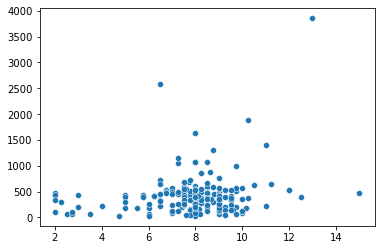

In [206]:
study_df2021 = df2021[(df2021.PrimaryActivityCode == 'Coursework') | (df2021.PrimaryActivityCode == 'Education / Lectures')]['DurationMins']

corr_sleep(study_df2021, 2021)